In [2]:
import numpy as np
from matplotlib.pyplot import *
from jupyterthemes import jtplot
%matplotlib inline
jtplot.style(theme='solarizedl', context='notebook', ticks=True)

In [3]:
gamma = 7/5
h_s = 7.99e3
t_s = 273 + 15
p_s = 101325
rho_s = 1.225

z = np.linspace(1, 25e3)
x = np.linspace(0, 100e3)
x,z = np.meshgrid(x, z)
t0 = t_s * (1 - ((gamma-1)/gamma) * (z/h_s))
t0[t0<0] = 0

In [4]:
common = 1 - ((gamma-1)/gamma) * (z/h_s)

p0 = p_s * common ** (gamma/(gamma-1))
rho0 = rho_s * common ** (1/(gamma-1))

In [5]:
noise = np.random.normal(1.0, 0.1, t0.shape)
t = noise * t0
rho = rho0 * (t0/t) ** (1-gamma)
p = p0 * (t0/t)**(gamma/(1-gamma))

In [6]:
H = 0.5
p0_sat = 611 * np.exp((17.2 * (t0-273.3))/t0)
p0_h2o = H * p0_sat

p_sat = 611 * np.exp((17.2 * (t-273.3))/t)
p_h2o = p0_h2o * (t0/t)**(gamma/(1-gamma))


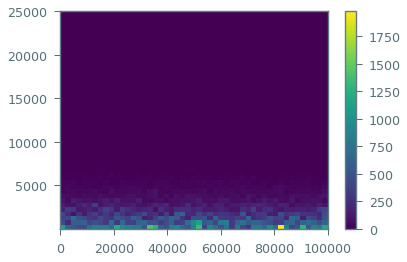

In [7]:
pcolor(x, z, p_h2o)
colorbar()

## Physical Constants

In [8]:
sigma = 72e-3
m1 = 2.99e-23
v1 = 997.0
kb = 1.38e-23
S = p_h2o/p_sat


## Experimenting with Nucleation